<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-VGG-RandDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Test the SoftRank Metrics on the  VGG11 Model







In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import sys
if 'google.colab' in sys.modules:
    !pip install weightwatcher

In [4]:
import logging

import weightwatcher as ww
import torchvision.models as models

logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.INFO)

ww.__version__

'0.6.3'

In [5]:
modelname = 'VGG11'
model = models.vgg11(pretrained=True)
watcher = ww.WeightWatcher(model=model)

INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1




python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


#### IDK why the ints are floats

In [6]:
details =  watcher.describe(model=model)
details

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_l

,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,2,Conv2d,3.0,64.0,21.333333,LAYER_TYPE.CONV2D,features.0,27.0,9.0
0,5,Conv2d,64.0,128.0,2.000000,LAYER_TYPE.CONV2D,features.3,576.0,9.0
0,8,Conv2d,128.0,256.0,2.000000,LAYER_TYPE.CONV2D,features.6,1152.0,9.0
0,10,Conv2d,256.0,256.0,1.000000,LAYER_TYPE.CONV2D,features.8,2304.0,9.0
0,13,Conv2d,256.0,512.0,2.000000,LAYER_TYPE.CONV2D,features.11,2304.0,9.0
0,15,Conv2d,512.0,512.0,1.000000,LAYER_TYPE.CONV2D,features.13,4608.0,9.0
0,18,Conv2d,512.0,512.0,1.000000,LAYER_TYPE.CONV2D,features.16,4608.0,9.0
0,20,Conv2d,512.0,512.0,1.000000,LAYER_TYPE.CONV2D,features.18,4608.0,9.0
0,25,Linear,4096.0,25088.0,6.125000,LAYER_TYPE.DENSE,classifier.0,4096.0,1.0
0,28,Linear,4096.0,4096.0,1.000000,LAYER_TYPE.DENSE,classifier.3,4096.0,1.0


INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [31]}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:torch version 1.12.1
INFO:weightwatcher:framework from model = 2
INFO:weightwatcher:Filtering layer by id 31


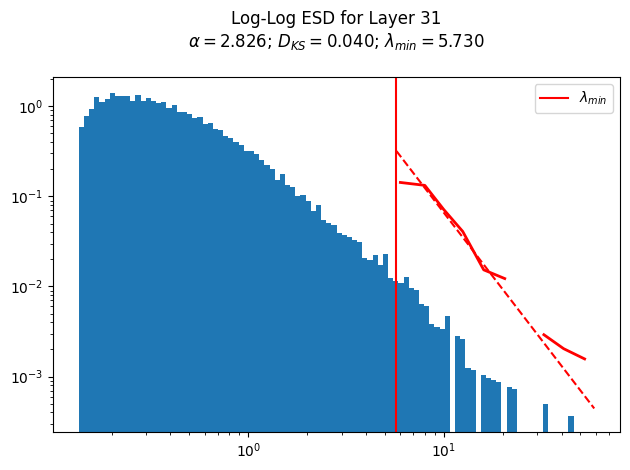

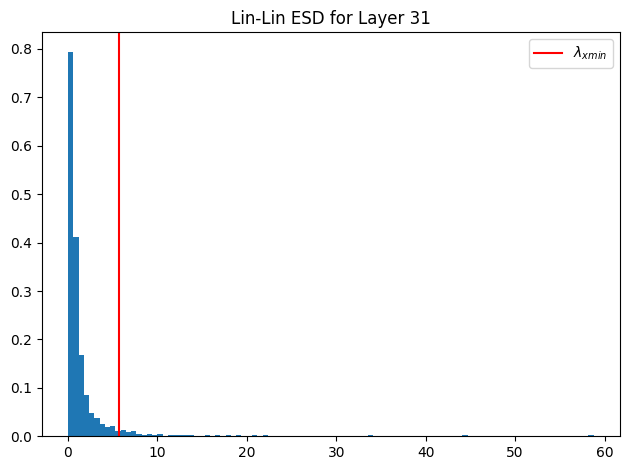

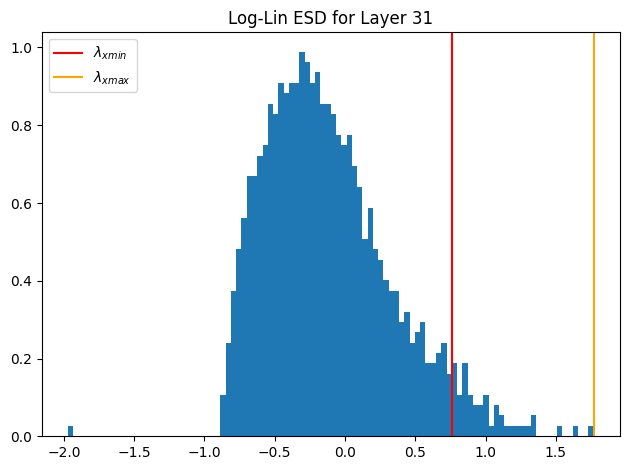

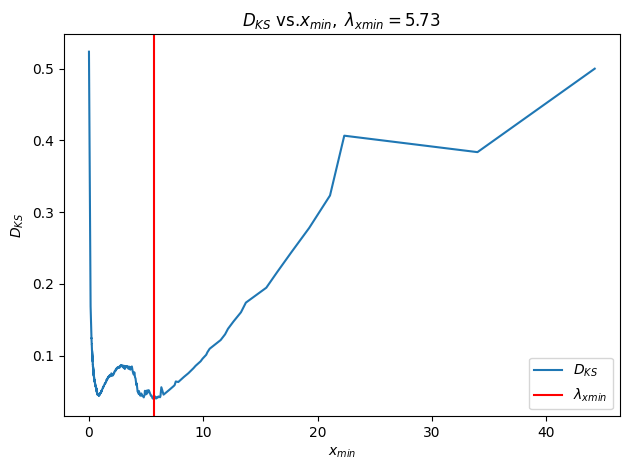

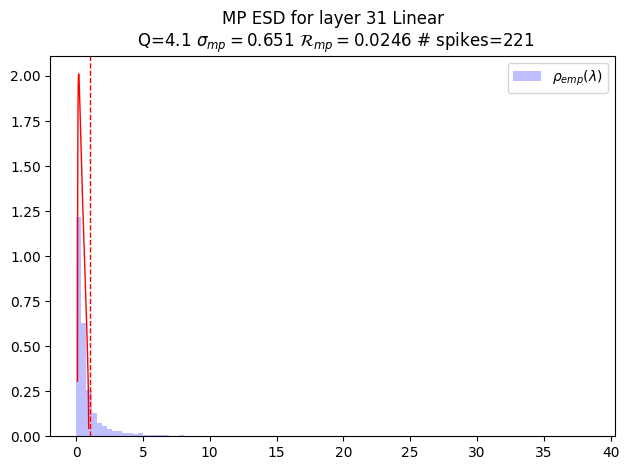

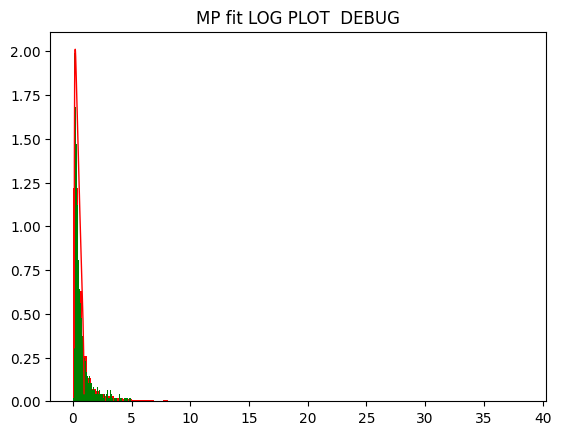

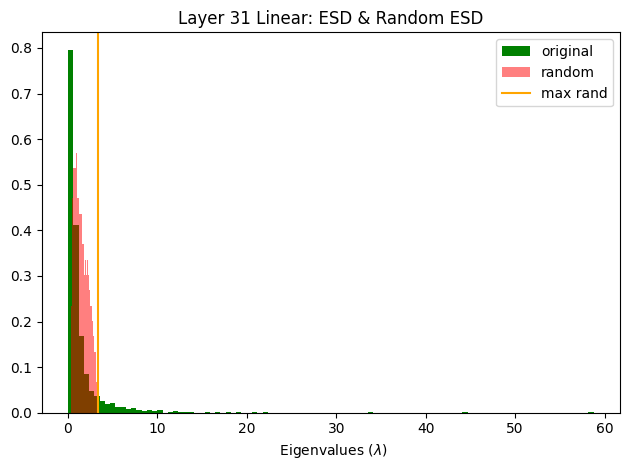

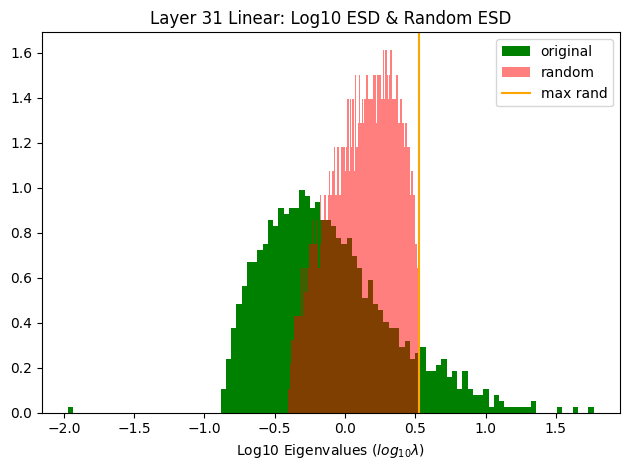

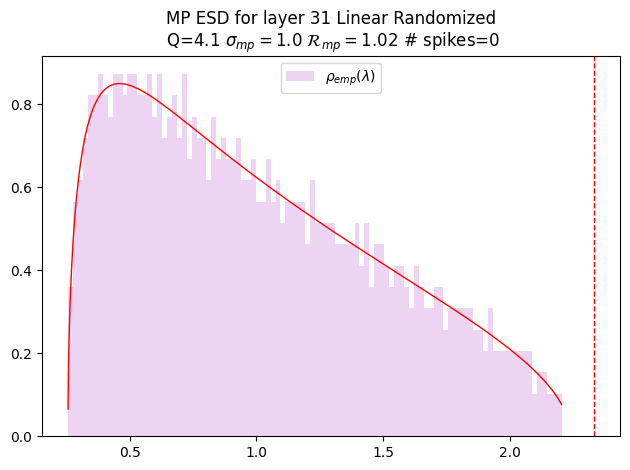

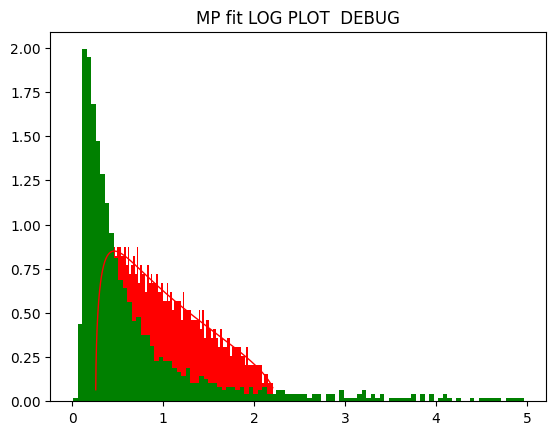

,layer_id,name,D,Lambda,M,N,Q,W_scale,alpha,alpha_weighted,...,sigma_mp,spectral_norm,stable_rank,sv_max,warning,weak_rank_loss,ww_maxdist,ww_softrank,xmax,xmin
0,31,Linear,0.039773,-1.0,1000.0,4096.0,4.096,0.808332,2.825653,4.999373,...,0.650927,58.786867,26.033945,7.667259,success,0.0,55.368102,0.058155,58.786867,5.73035


In [11]:
details =  watcher.analyze(model=model, layers=[31], plot=True, randomize=True, mp_fit=True)
details

In [12]:
details.

Index(['layer_id', 'name', 'D', 'Lambda', 'M', 'N', 'Q', 'W_scale', 'alpha',
       'alpha_weighted', 'best_fit', 'bulk_max', 'bulk_min', 'entropy',
       'has_esd', 'lambda_max', 'layer_type', 'log_alpha_norm', 'log_norm',
       'log_spectral_norm', 'longname', 'matrix_rank', 'max_rand_eval',
       'mp_softrank', 'norm', 'num_evals', 'num_pl_spikes', 'num_spikes',
       'rand_W_scale', 'rand_bulk_max', 'rand_bulk_min', 'rand_distance',
       'rand_mp_softrank', 'rand_num_spikes', 'rand_sigma_mp', 'rank_loss',
       'rf', 'sigma', 'sigma_mp', 'spectral_norm', 'stable_rank', 'sv_max',
       'warning', 'weak_rank_loss', 'ww_maxdist', 'ww_softrank', 'xmax',
       'xmin'],
      dtype='object')

In [22]:
details.mp_softrank[0], details.ww_softrank[0]

(0.02462447485351563, 0.058155245532318246)

In [17]:
details.max_rand_eva, details.lambda_max

(0    3.374576
 Name: max_rand_eval, dtype: float64,
 0    58.786867
 Name: lambda_max, dtype: float64)

In [18]:
details.max_rand_eval[0]/details.lambda_max[0]

0.05740357099965669

In [7]:
import powerlaw

def plot_loghist(x, bins, xmin):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, density=True)

    if xmin:
        plt.axvline(xmin, color='r', label=r'$\lambda_{min}$')

    plt.xscale('log')


Calculating best minimal value for power law fit


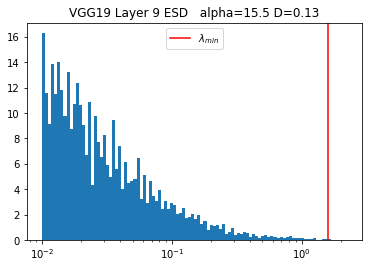

In [22]:
layer_id = 9
esd = watcher.get_ESD(layer=layer_id)
esd = esd[esd>0.01]
results = powerlaw.Fit(esd, xmax=np.max(esd))
plot_loghist(esd, bins=100, xmin=results.xmin);
title = "{} Layer {} ESD".format(modelname, layer_id)
title += "   alpha={:0.3} D={:0.3}".format(results.alpha, results.D)
plt.title(title)
plt.legend()

  0%|          | 0/441 [00:00<?, ?it/s]Calculating best minimal value for power law fit
Assuming nested distributions
  0%|          | 1/441 [00:02<18:07,  2.47s/it]Calculating best minimal value for power law fit
Assuming nested distributions
  0%|          | 2/441 [00:04<18:06,  2.47s/it]Calculating best minimal value for power law fit
Assuming nested distributions
  0%|          | 2/441 [00:07<27:51,  3.81s/it]

2 1.887176475026711 0.14655780126237317 7.716794687711722 0.0


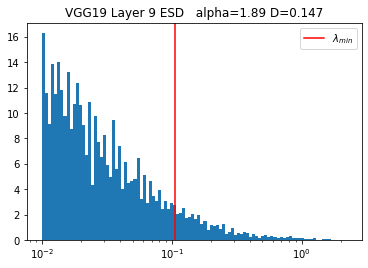

In [23]:
N = int(len(esd)/2)
for idx in tqdm(range(0,N,1)):
    if idx == 0:
        xmax = np.max(esd)
    else:
        xmax = np.max(esd[-idx])
        
    results = powerlaw.Fit(esd, xmax=xmax)
    alpha, D = results.alpha, results.D
    # stop when distribtion becomes power law
    R, p = results.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True)
    if R > 0.0:
        print(idx, alpha, D, R,p)
        
        plot_loghist(esd, bins=100, xmin=results.xmin);
        title = "{} Layer {} ESD".format(modelname, layer_id)
        title += "   alpha={:0.3} D={:0.3}".format(results.alpha, results.D)
        plt.title(title)
        plt.legend()
        break
